In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [5]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
df = df.drop(columns=['Id'])


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Text(0.5, 1.0, 'Sepal Length(cm)')

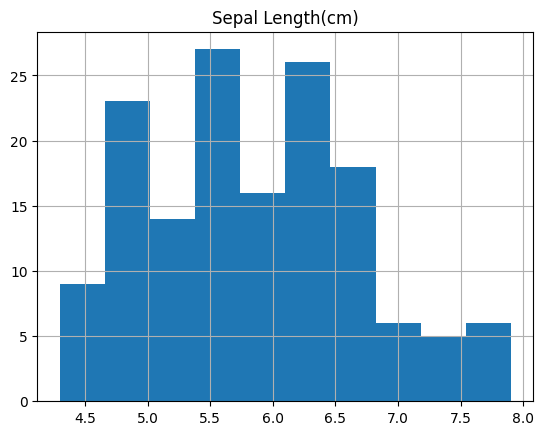

In [8]:
df['SepalLengthCm'].hist()
plt.title('Sepal Length(cm)')

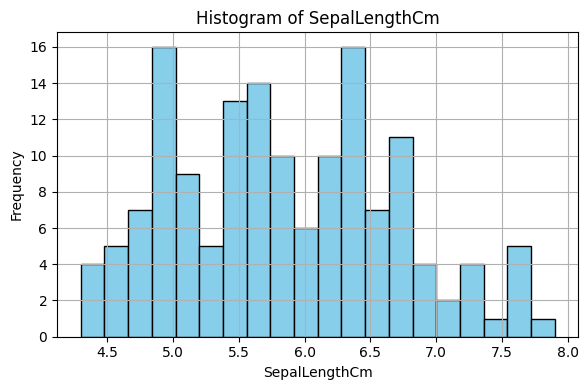

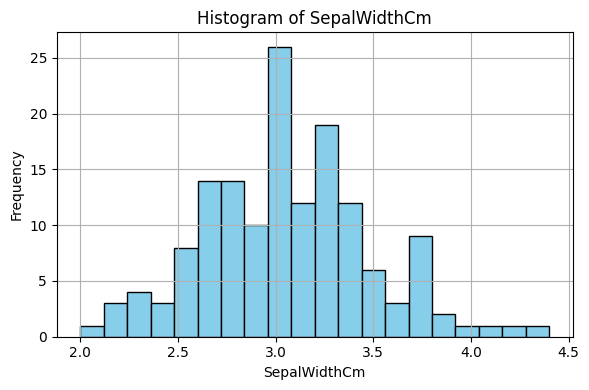

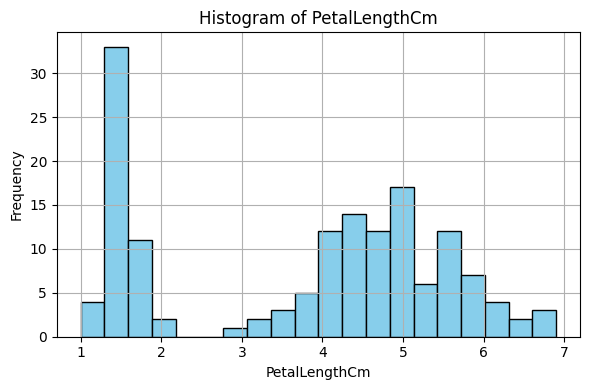

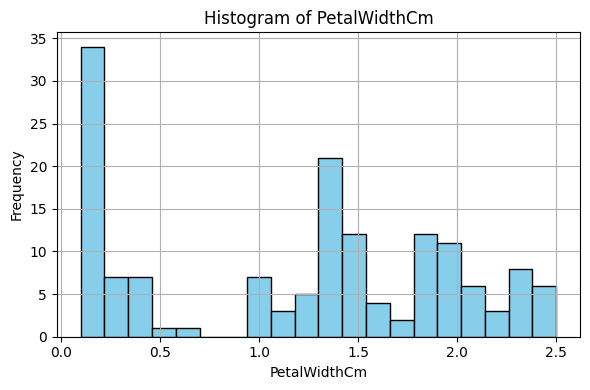

In [9]:
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

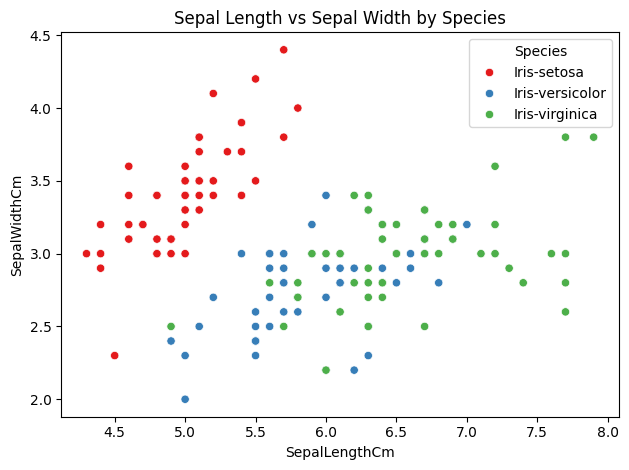

In [10]:
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species', palette='Set1')
plt.title('Sepal Length vs Sepal Width by Species')
plt.tight_layout()
plt.show()


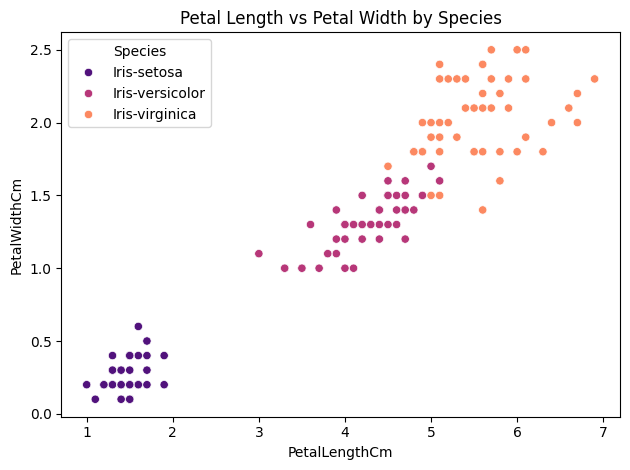

In [11]:
sns.scatterplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species', palette='magma')
plt.title('Petal Length vs Petal Width by Species')
plt.tight_layout()
plt.show()


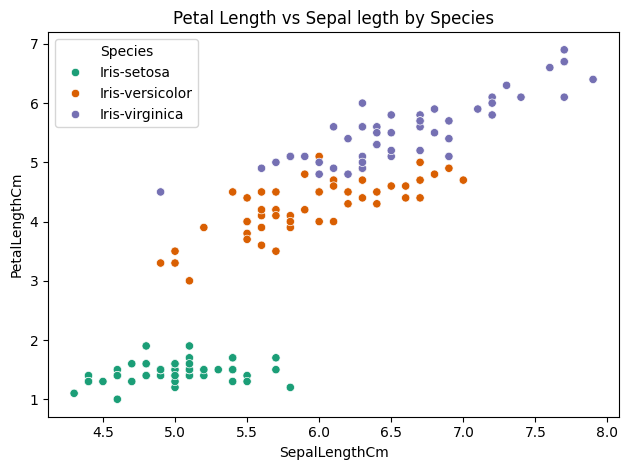

In [12]:
sns.scatterplot(data=df, x='SepalLengthCm', y='PetalLengthCm', hue='Species', palette='Dark2')
plt.title('Petal Length vs Sepal legth by Species')
plt.tight_layout()
plt.show()


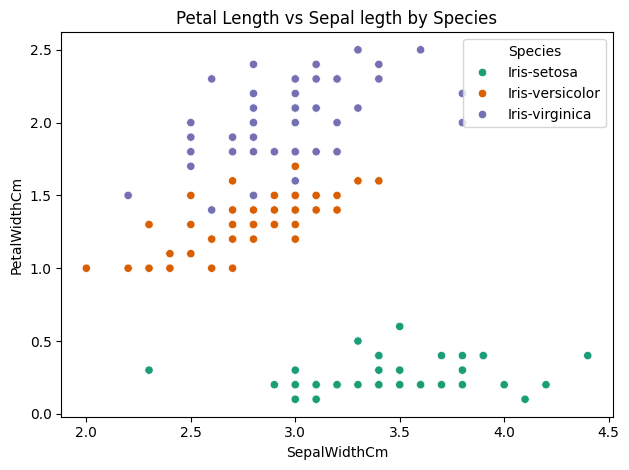

In [13]:
sns.scatterplot(data=df, x='SepalWidthCm', y='PetalWidthCm', hue='Species', palette='Dark2')
plt.title('Petal Length vs Sepal legth by Species')
plt.tight_layout()
plt.show()


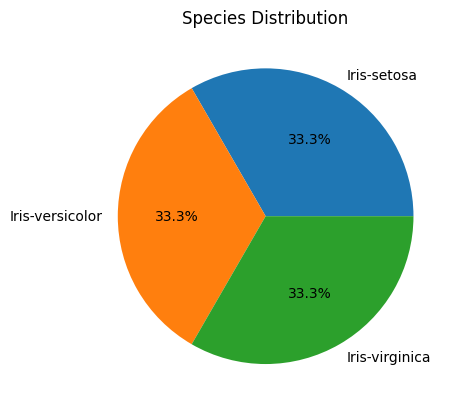

<Figure size 800x400 with 0 Axes>

In [14]:
gender_counts = df['Species'].value_counts()


plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title("Species Distribution")
plt.figure(figsize=(8,4))
plt.show()

In [15]:
df2 = df.drop(columns=['Species'])
corr = df2.corr()

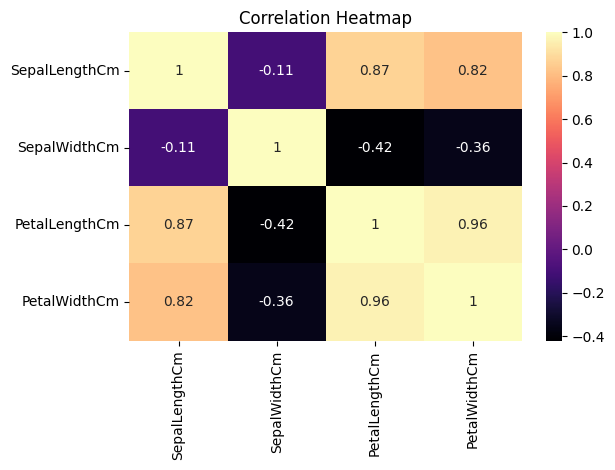

In [16]:
sns.heatmap(corr, annot=True, cmap='magma')  # You can change 'coolwarm' to other palettes
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [18]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [21]:
model.fit(x_train, y_train)

LogisticRegression()

In [22]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


In [23]:
model.predict([[5.1,3.2,1.3,0.2]])

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [24]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier()

In [25]:
model1.fit(x_train, y_train)

KNeighborsClassifier()

In [26]:
print("Accuracy: ",model1.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


In [27]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [28]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [29]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556


In [32]:
joblib.dump(model1, "model.joblib")

['model.joblib']

In [33]:
saved_model = joblib.load("model.joblib")
saved_model

KNeighborsClassifier()